<font face="Verdana" size=5 color=#A52A2A > 1.K-Mean Clustering

/Users/zhaotianfeng/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


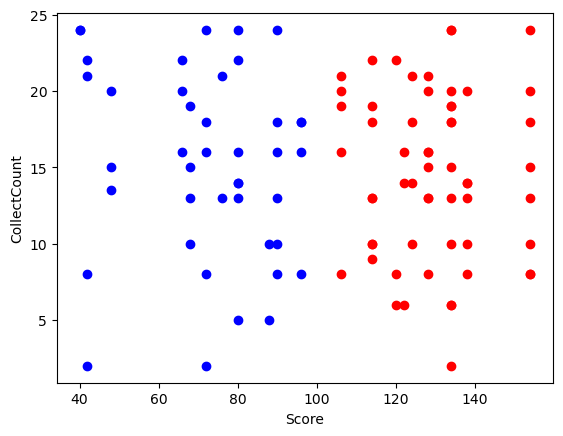

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load data from CSV file
data = pd.read_csv('new_generated.csv')
X = data[['Score', 'CollectCount']].values

# Perform clustering with K-Means
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
labels = kmeans.labels_

# Add the labels as a new column in the original data frame
data['Performance'] = labels

# Save the labeled data to a new CSV file
data.to_csv('labeled_data.csv', index=False)

# Visualize the results
colors = ['red', 'blue']
for i in range(2):
    plt.scatter(X[labels==i, 0], X[labels==i, 1], c=colors[i])
plt.xlabel('Score')
plt.ylabel('CollectCount')
plt.show()


In [337]:
import csv
with open('labeled_data.csv', 'r') as csvfile:
    csvreader = csv.reader(csvfile)
    rows_to_write = []
    for row in csvreader:
        if(row[31] != "Score"):
            if (float(row[30])*4 > float(row[31])) | (float(row[30])*10 < float(row[31])):
                continue
        rows_to_write.append(row)
        
with open('filtered_data.csv', 'w', newline='') as csvfile:
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(rows_to_write)

<font face="Verdana" size=5 color=#A52A2A > 2.Decision Tree

In [314]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv('filtered_data.csv')
# drop the attributes used for clustering.
data = data.drop('Score',axis=1)
data = data.drop('CollectCount',axis=1)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('Performance',axis=1),
    data['Performance'], 
    test_size=0.2, 
    random_state=42
)

In [319]:
from sklearn import tree
# initialise the tree.
clf = tree.DecisionTreeClassifier()
# fit the tree.
clf = clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

# set the tree critical parameter seeds.
param_grid = {
    'max_depth': [1, 3, 5, 7, 9],
    'min_samples_split': [2, 4, 6, 8, 10]
}

# Define the grid search object
grid_search = GridSearchCV(
    clf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

# Train the grid search object on the training data
grid_search.fit(X_train, y_train)

importances = clf.feature_importances_

# Test the grid search object on the testing data
accuracy = grid_search.score(X_test, y_test)

print('Best parameters:', grid_search.best_params_)
print('Accuracy:', accuracy)

# print the correlations of each attributes with the key attribute. 
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")

Best parameters: {'max_depth': 5, 'min_samples_split': 2}
Accuracy: 0.6666666666666666
Feature 0: 0.0
Feature 1: 0.0
Feature 2: 0.0
Feature 3: 0.0
Feature 4: 0.17307692307692313
Feature 5: 0.0
Feature 6: 0.0
Feature 7: 0.0
Feature 8: 0.0
Feature 9: 0.0
Feature 10: 0.0
Feature 11: 0.08333333333333334
Feature 12: 0.0
Feature 13: 0.1730769230769231
Feature 14: 0.0
Feature 15: 0.0
Feature 16: 0.15
Feature 17: 0.05
Feature 18: 0.16955128205128203
Feature 19: 0.0
Feature 20: 0.15512820512820505
Feature 21: 0.0
Feature 22: 0.0
Feature 23: 0.04583333333333339
Feature 24: 0.0
Feature 25: 0.0
Feature 26: 0.0
Feature 27: 0.0
Feature 28: 0.0
Feature 29: 0.0


In [320]:
from sklearn.datasets import load_iris
from sklearn import tree
# draw the visible tree.
iris = load_iris()
clf = clf.fit(iris.data, iris.target)

import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris")

'iris.pdf'

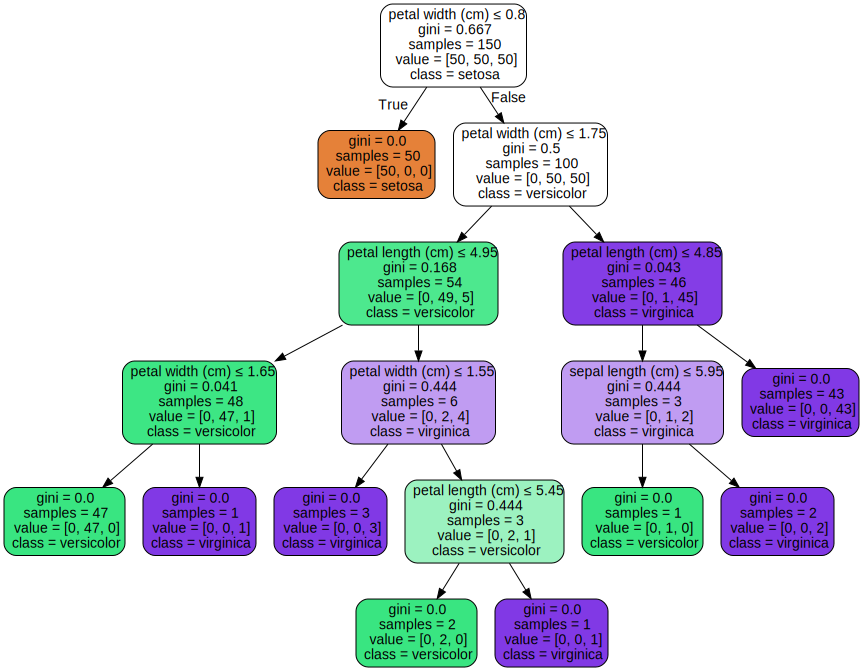

In [321]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [322]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
# using another tree to verify the classification.
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
discrete_columns = ["point_one_speed","point_one_deviation","point_two_speed","point_two_deviation","point_three_speed","point_three_deviation",
"point_four_speed","point_four_deviation","point_five_speed","point_five_deviation","point_six_speed","point_six_deviation",
"point_seven_speed","point_seven_deviation","point_eight_speed","point_eight_deviation","point_nine_speed","point_nine_deviation",
"point_ten_speed","point_ten_deviation","point_eleven_speed","point_eleven_deviation","point_twelve_speed","point_twelve_deviation",
"point_thirteen_speed","point_thirteen_deviation","point_fourteen_speed","point_fourteen_deviation","point_fifteen_speed","point_fifteen_deviation","CollectCount","Score"
]
# print the correlations
for name,correlation in zip(discrete_columns,model.feature_importances_):
    print(name, ":", correlation)

point_one_speed : 0.016400496500042532
point_one_deviation : 0.02845420785829922
point_two_speed : 0.023451704333001304
point_two_deviation : 0.018563432824485457
point_three_speed : 0.06035301786137385
point_three_deviation : 0.029426703971081773
point_four_speed : 0.027644491431422544
point_four_deviation : 0.03319680082282299
point_five_speed : 0.03183463534918832
point_five_deviation : 0.04012897233944421
point_six_speed : 0.0413468797809782
point_six_deviation : 0.04542015626327798
point_seven_speed : 0.023685692696500876
point_seven_deviation : 0.029464260443886517
point_eight_speed : 0.02341913996746038
point_eight_deviation : 0.023629963816646442
point_nine_speed : 0.03403482038345763
point_nine_deviation : 0.036612962398798306
point_ten_speed : 0.04966806748005303
point_ten_deviation : 0.022403625419481498
point_eleven_speed : 0.05048259060563467
point_eleven_deviation : 0.02612154877017844
point_twelve_speed : 0.05544320997782618
point_twelve_deviation : 0.033201711602591104


<font face="Verdana" size=5 color=#A52A2A > 3. Neural Network

In [323]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif,VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from tensorflow import keras

In [324]:
performance = pd.read_csv('labeled_data.csv',index_col=None)
performance.describe()

,point_one_speed,point_one_deviation,point_two_speed,point_two_deviation,point_three_speed,point_three_deviation,point_four_speed,point_four_deviation,point_five_speed,point_five_deviation,...,point_twelve_deviation,point_thirteen_speed,point_thirteen_deviation,point_fourteen_speed,point_fourteen_deviation,point_fifteen_speed,point_fifteen_deviation,CollectCount,Score,Performance
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,2.174013,36.214335,2.112423,33.711017,2.438782,26.770637,2.110227,29.019829,1.837830,30.523409,...,36.549572,1.868748,24.099911,2.371137,25.921257,1.942165,35.558657,14.825500,105.24000,0.420000
std,1.090727,18.860479,1.081952,20.877806,1.120904,17.238211,0.955359,12.530396,1.080301,18.505708,...,27.706316,0.827206,13.515063,1.034316,16.287889,1.187479,17.929242,5.728766,32.16219,0.496045
min,0.841993,10.612557,0.228964,13.712780,0.889602,7.440131,0.683298,8.791589,0.451669,10.502102,...,5.956450,0.538023,7.008839,0.756757,9.154204,0.629213,12.636836,2.000000,40.00000,0.000000
25%,1.232281,18.969780,1.063544,18.842723,1.489255,11.217401,1.431151,20.937740,0.883946,17.679052,...,15.285708,1.370480,15.160261,1.418362,16.334832,1.022528,23.957687,10.000000,80.00000,0.000000
50%,2.264576,35.074637,2.035690,21.955735,2.397268,27.769931,1.979040,26.671503,1.840900,25.227877,...,28.650617,1.730782,21.970677,2.436654,19.459735,1.776809,33.159741,15.000000,114.00000,0.000000
75%,2.626385,42.846451,2.630593,44.702640,3.108030,43.877729,2.488554,35.417450,1.887425,37.048318,...,32.016304,2.140535,33.300031,2.475609,26.609599,2.045960,52.169776,19.250000,134.00000,1.000000
max,5.405318,84.960463,4.316053,77.911685,4.399776,61.655352,4.056152,55.420873,4.252614,75.856844,...,96.253725,3.547875,48.055736,4.428340,78.150463,5.090909,68.994122,24.000000,154.00000,1.000000


In [325]:
emptyList = []
performanceColumn = performance.columns
print(performanceColumn)

for index, row in performance.iterrows():
    for name in performanceColumn:
        if row[name] == 0:
            performance.at[index,name]=performance[name].median()
temp = performance.drop(emptyList)
#reformative the data, make is continuous.
temp = temp.reset_index(drop=True)
performance = temp
performance.describe()

Index(['point_one_speed', 'point_one_deviation', 'point_two_speed',
       'point_two_deviation', 'point_three_speed', 'point_three_deviation',
       'point_four_speed', 'point_four_deviation', 'point_five_speed',
       'point_five_deviation', 'point_six_speed', 'point_six_deviation',
       'point_seven_speed', 'point_seven_deviation', 'point_eight_speed',
       'point_eight_deviation', 'point_nine_speed', 'point_nine_deviation',
       'point_ten_speed', 'point_ten_deviation', 'point_eleven_speed',
       'point_eleven_deviation', 'point_twelve_speed',
       'point_twelve_deviation', 'point_thirteen_speed',
       'point_thirteen_deviation', 'point_fourteen_speed',
       'point_fourteen_deviation', 'point_fifteen_speed',
       'point_fifteen_deviation', 'CollectCount', 'Score', 'Performance'],
      dtype='object')


,point_one_speed,point_one_deviation,point_two_speed,point_two_deviation,point_three_speed,point_three_deviation,point_four_speed,point_four_deviation,point_five_speed,point_five_deviation,...,point_twelve_deviation,point_thirteen_speed,point_thirteen_deviation,point_fourteen_speed,point_fourteen_deviation,point_fifteen_speed,point_fifteen_deviation,CollectCount,Score,Performance
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,2.174013,36.214335,2.112423,33.711017,2.438782,26.770637,2.110227,29.019829,1.837830,30.523409,...,36.549572,1.868748,24.099911,2.371137,25.921257,1.942165,35.558657,14.825500,105.24000,0.420000
std,1.090727,18.860479,1.081952,20.877806,1.120904,17.238211,0.955359,12.530396,1.080301,18.505708,...,27.706316,0.827206,13.515063,1.034316,16.287889,1.187479,17.929242,5.728766,32.16219,0.496045
min,0.841993,10.612557,0.228964,13.712780,0.889602,7.440131,0.683298,8.791589,0.451669,10.502102,...,5.956450,0.538023,7.008839,0.756757,9.154204,0.629213,12.636836,2.000000,40.00000,0.000000
25%,1.232281,18.969780,1.063544,18.842723,1.489255,11.217401,1.431151,20.937740,0.883946,17.679052,...,15.285708,1.370480,15.160261,1.418362,16.334832,1.022528,23.957687,10.000000,80.00000,0.000000
50%,2.264576,35.074637,2.035690,21.955735,2.397268,27.769931,1.979040,26.671503,1.840900,25.227877,...,28.650617,1.730782,21.970677,2.436654,19.459735,1.776809,33.159741,15.000000,114.00000,0.000000
75%,2.626385,42.846451,2.630593,44.702640,3.108030,43.877729,2.488554,35.417450,1.887425,37.048318,...,32.016304,2.140535,33.300031,2.475609,26.609599,2.045960,52.169776,19.250000,134.00000,1.000000
max,5.405318,84.960463,4.316053,77.911685,4.399776,61.655352,4.056152,55.420873,4.252614,75.856844,...,96.253725,3.547875,48.055736,4.428340,78.150463,5.090909,68.994122,24.000000,154.00000,1.000000


<Axes: xlabel='Performance', ylabel='count'>

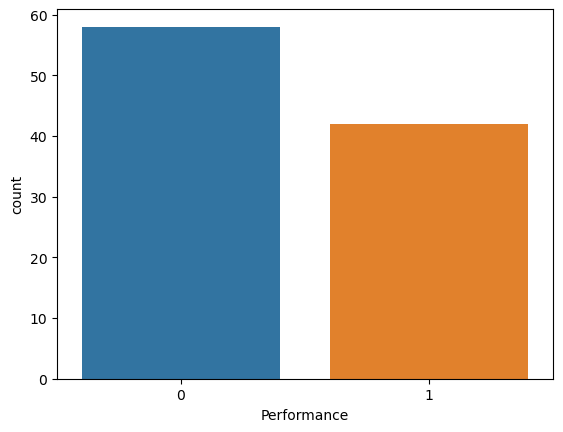

In [326]:
sns.countplot(x = 'Performance', data =performance)

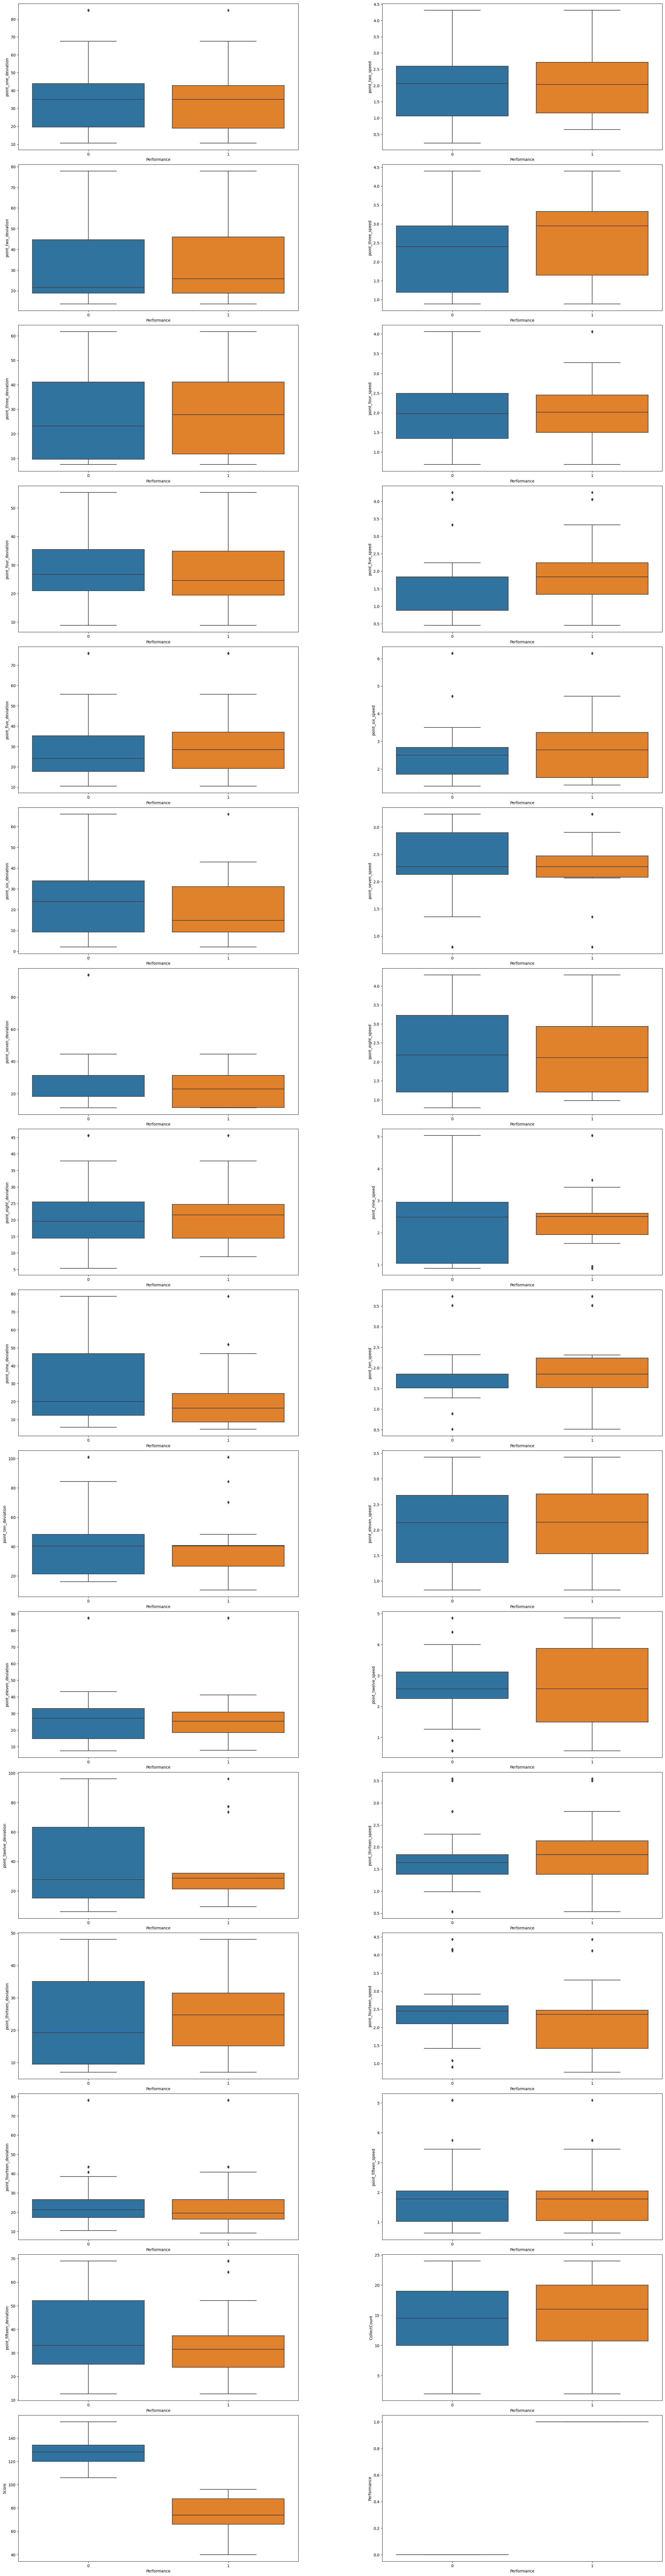

In [327]:
fig,axes=plt.subplots(nrows=16,ncols=2,figsize=(30,120))
fig.subplots_adjust(hspace=.10,wspace=.3)
axes=axes.ravel()

for i,col in enumerate(performance.columns[1:]):
   _=sns.boxplot(y=col,x='Performance',data=performance,ax=axes[i])

In [350]:
corrMatt = performance.corr()
#Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(200, 120))
plt.title('Point Performance Correlation')
#Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio 
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
           ax=ax, annot=True, fmt='.2g', linewidths=1)

<Axes: title={'center': 'Point Performance Correlation'}>

In [349]:
# Import required libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Load the dataset
performance = pd.read_csv('labeled_data.csv')
performance = performance.astype(np.float32)
# Preprocess the data
X = performance.drop(columns=['Performance'])
X = performance.drop(columns=['Score'])
X = performance.drop(columns=['CollectCount'])
y = performance['Performance']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

# Define the neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='LeakyReLU'))
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='Adagrad', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, verbose=1)

# Evaluate the model on test data
scores = model.evaluate(X_test, y_test, verbose=1)
print('Accuracy: %.2f%%' % (scores[1]*100))

Epoch 1/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5429
Epoch 2/50
2/2 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5143
Epoch 3/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.4714
Epoch 4/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5857
Epoch 5/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5571
Epoch 6/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 7/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5714
Epoch 8/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5714
Epoch 9/50
2/2 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.5286
Epoch 10/50
2/2 [==============================] - 0s 1ms/step - loss: 0.0000e+00 - accuracy: 0.5143

In [334]:
new_data = pd.read_csv('labeled_data.csv')
X_new = new_data.drop(columns=['Performance']).values
y_true = new_data['Performance'].values
y_pred = model.predict(X_new)

loss, accuracy = model.evaluate(X_new, y)
print('Loss:', loss)
print('Accuracy:', accuracy)

from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_true, np.argmax(y_pred, axis=1))
print('Confusion matrix:')
print(confusion)

4/4 [==============================] - 0s 986us/step - loss: 0.0000e+00 - accuracy: 0.5800
Loss: 0.0
Accuracy: 0.5799999833106995
Confusion matrix:
[[58  0]
 [42  0]]


In [333]:
import tensorflow as tf
import pandas as pd

# Load the dataset into a pandas DataFrame
df = pd.read_csv('labeled_data.csv')

# Split the data into training and validation sets
train_size = int(0.8 * len(df))
train_df = df[:train_size]
val_df = df[train_size:]

# Define the input and output dimensions
input_dim = len(df.columns) - 1
output_dim = 1

# Create the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=[input_dim]),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(output_dim)
])

# Compile the model
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001))

# Train the model
history = model.fit(train_df.iloc[:, :-1], train_df.iloc[:, -1], epochs=50,
                    validation_data=(val_df.iloc[:, :-1], val_df.iloc[:, -1]))

# Get the model's predictions on the validation set
predictions = model.predict(val_df.iloc[:, :-1])

# Calculate the correlation coefficient between each input feature and the target variable
corr_coef = []
for i in range(input_dim):
    corr_coef.append(val_df.iloc[:, i].corr(val_df.iloc[:, -1]))

# Print the correlation coefficients
for i, col in enumerate(val_df.columns[:-1]):
    print(f"{col} correlation coefficient: {corr_coef[i]}")



Epoch 1/50
3/3 [==============================] - 0s 39ms/step - loss: 72.2490 - val_loss: 146.5795
Epoch 2/50
3/3 [==============================] - 0s 8ms/step - loss: 80.6388 - val_loss: 71.4753
Epoch 3/50
3/3 [==============================] - 0s 9ms/step - loss: 38.6652 - val_loss: 58.7772
Epoch 4/50
3/3 [==============================] - 0s 10ms/step - loss: 32.9838 - val_loss: 44.6632
Epoch 5/50
3/3 [==============================] - 0s 10ms/step - loss: 18.8133 - val_loss: 38.9982
Epoch 6/50
3/3 [==============================] - 0s 9ms/step - loss: 18.8160 - val_loss: 30.1511
Epoch 7/50
3/3 [==============================] - 0s 10ms/step - loss: 10.0057 - val_loss: 32.3893
Epoch 8/50
3/3 [==============================] - 0s 10ms/step - loss: 11.1199 - val_loss: 31.4661
Epoch 9/50
3/3 [==============================] - 0s 10ms/step - loss: 8.2374 - val_loss: 20.3793
Epoch 10/50
3/3 [==============================] - 0s 10ms/step - loss: 8.1222 - val_loss: 17.4368
Epoch 11/50
3